## Overview
A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

## Objective
You are the best data scientist in Greenland and they've hired you to solve this problem. Now you are responsible for developing a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

### Contents:
1. Import necessay libraries
2. Load the dataset
3. Data Analysis
4. Cleaning data
5. Data visualization
6. Gradient Boost Classifier Model
7. Prediction

### 1) Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

from sklearn.preprocessing import StandardScaler, scale
%matplotlib inline

### 2) Load the dataset

In [2]:
# Load the datasets
train_df = pd.read_csv("./data/Train_Data.csv")
test_df = pd.read_csv("./data/Test_Data.csv")

### 3) Data analysis
We're going to consider the features in the dataset and how complete they are.

In [3]:
#get a list of the features within the dataset
print(train_df.columns)

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')


In [4]:
#see a sample of the dataset to get an idea of the variables
train_df.sample(5)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
16218,20330,38,9198,DX6,25,25.730786,YES,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
16994,6891,16,8351,DX6,33,20.405656,YES,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
371,10823,25,8889,DX6,51,20.706099,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0
17696,7901,4,11950,DX6,0,19.870664,NO,URBAN,Stable,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0
12566,20736,49,11850,DX4,6,18.006940,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0


In [5]:
#Let's see the data types of each feature
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.

In [6]:
#see a summary of the training dataset
train_df.describe(include = "all")

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23084,23097.000000,23097.000000,23097,23097,23097,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
unique,NaN,NaN,NaN,32,NaN,NaN,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,DX6,NaN,NaN,NO,RURAL,Stable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,8606,NaN,NaN,13246,16134,23097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16545.712041,26.413127,6261.280772,NaN,33.209768,23.454820,NaN,NaN,NaN,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,NaN,19.549882,3.807661,NaN,NaN,NaN,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,NaN,0.000000,1.089300,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,NaN,16.000000,20.205550,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,NaN,33.000000,23.386199,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,NaN,50.000000,26.788154,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000


#### Some Observations:
* There are a total of 23097 patients in our training set.
* The "Treated_with_drugs" feature is missing approximately 1% of its values. I'm guessing that this feature is pretty important to survival, so we should probably attempt to fill these gaps. 
* The A, B, C, D, E, F, Z features have no relavant description column names and I think these features are not important.
* The Patient_mental_condition has only one unique value, so we will drop this feature column.
* The max age of the Patient_Age feature is 149, so we will place a threshold for this feature which is 100 and will drop all the patient who age is greater than 100.

In [7]:
#check for any other unusable values
print(pd.isnull(train_df).sum())

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64


### 4) Data cleaning
We will have to clean the datasets before visualization because with messy data, we will not be able to clearly describe the insights.

In [8]:
# Dropping umimportant columns
cols_to_drop = ['ID_Patient_Care_Situation','Patient_mental_condition', 'Patient_ID',
                'A', 'B', 'C', 'D','E', 'F', 'Z']
train_df = train_df.drop(cols_to_drop,axis=1)
test_df = test_df.drop(cols_to_drop,axis=1)

In [9]:
# Drop patient with age greater than 100
train_df = train_df[train_df.Patient_Age < 100]
test_df = test_df[test_df.Patient_Age < 100]

In [10]:
# Inspect the categorical features
print(train_df['Patient_Smoker'].unique())
print(test_df['Patient_Smoker'].unique())

['YES' 'NO']
['NO' 'YES']


Although there are three unique values in Patient_Smoker column for train dataset when we explore above, the "Cannot Say" value got deleted when we drop rows with patient whose age greater than 100. Therefore, it is okay now for this feature.

In [11]:
train_df.Treated_with_drugs.unique()

array(['DX6', 'DX2 ', 'DX1 ', 'DX3 ', 'DX5 ', 'DX4 ', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX3 DX4 ', 'DX1 DX4 ',
       'DX1 DX5 ', 'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX2 DX4 ',
       'DX3 DX4 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX4 ', 'DX4 DX5 ',
       'DX2 DX3 DX4 ', 'DX1 DX4 DX5 ', 'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ',
       'DX1 DX2 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX3 DX4 DX5 ',
       'DX1 DX2 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

As you can see, above categorical feature cannot be any help because the values are messy and we have to transform them.
We will transform them by constructing each drug name in a new column. We will also drop rows with nan values.

In [12]:
# Drop rows with nan values
train_df.dropna(subset=['Treated_with_drugs'], how='any', inplace=True)
train_df = train_df[train_df.Treated_with_drugs != 'nan']
test_df.dropna(subset=['Treated_with_drugs'], how='any', inplace=True)
test_df = test_df[test_df.Treated_with_drugs != 'nan']

In [13]:
# Replace with lower case letter
def format_value(x):
    x = str(x).strip()
    x = x.lower()
    return x

In [14]:
train_df['Treated_with_drugs'] = train_df['Treated_with_drugs'].map(format_value)
test_df['Treated_with_drugs'] = test_df['Treated_with_drugs'].map(format_value)

In [15]:
train_df.Treated_with_drugs.unique()

array(['dx6', 'dx2', 'dx1', 'dx3', 'dx5', 'dx4', 'dx2 dx5', 'dx2 dx3',
       'dx1 dx3', 'dx1 dx2', 'dx3 dx4', 'dx1 dx4', 'dx1 dx5',
       'dx2 dx4 dx5', 'dx1 dx2 dx3', 'dx3 dx5', 'dx2 dx4', 'dx3 dx4 dx5',
       'dx2 dx3 dx5', 'dx1 dx2 dx3 dx4', 'dx4 dx5', 'dx2 dx3 dx4',
       'dx1 dx4 dx5', 'dx1 dx2 dx4', 'dx1 dx3 dx5', 'dx1 dx2 dx5',
       'dx1 dx3 dx4', 'dx1 dx3 dx4 dx5', 'dx1 dx2 dx4 dx5',
       'dx2 dx3 dx4 dx5', 'dx1 dx2 dx3 dx5', 'dx1 dx2 dx3 dx4 dx5'],
      dtype=object)

In [16]:
# Split the text in each row and create new dataframes
df1 = train_df['Treated_with_drugs'].str.split(" ", expand=True)
df2 = test_df['Treated_with_drugs'].str.split(" ", expand=True)

In [17]:
# Rename the column names
df1 = df1.rename(columns={0:'T1',1:'T2',2:'T3',3:'T4',4:'T5'})
df2 = df2.rename(columns={0:'T1',1:'T2',2:'T3',3:'T4',4:'T5'})

In [18]:
# Fill the nan values with 'dx0' for better understanding
df1 = df1.fillna('dx0')
df2 = df2.fillna('dx0')

In [19]:
# Combine with original dataframe
train = pd.concat([df1,train_df],axis=1)
test = pd.concat([df2,test_df],axis=1)

In [20]:
# Drop the Treated_with_drugs column for train and test data sets
train = train.drop(['Treated_with_drugs'], axis=1)
test = test.drop(['Treated_with_drugs'], axis=1)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   T1                       23084 non-null  object 
 1   T2                       23084 non-null  object 
 2   T3                       23084 non-null  object 
 3   T4                       23084 non-null  object 
 4   T5                       23084 non-null  object 
 5   Diagnosed_Condition      23084 non-null  int64  
 6   Patient_Age              23084 non-null  int64  
 7   Patient_Body_Mass_Index  23084 non-null  float64
 8   Patient_Smoker           23084 non-null  object 
 9   Patient_Rural_Urban      23084 non-null  object 
 10  Number_of_prev_cond      21849 non-null  float64
 11  Survived_1_year          23084 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 2.3+ MB


### 5) Data visualization

#### Patient_Smoker feature

Percentage of non-smoker who survived: 73.7354673108863
Percentage of smoker who survived: 49.02419190892458


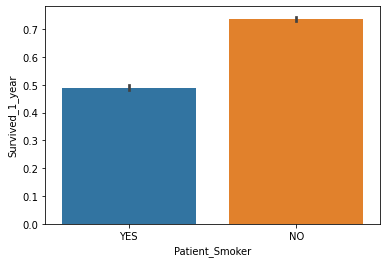

In [22]:
#draw a bar plot of survival by smoking condition
sns.barplot(x="Patient_Smoker", y="Survived_1_year", data=train)

#print percentages of smoker vs. non-smoker that survive
print("Percentage of non-smoker who survived:", train["Survived_1_year"][train["Patient_Smoker"] == 'NO'].value_counts(normalize = True)[1]*100)

print("Percentage of smoker who survived:", train["Survived_1_year"][train["Patient_Smoker"] == 'YES'].value_counts(normalize = True)[1]*100)

As we can see from above graph, patients who do not smoke have higher survival rate.

#### Patient_Rural_Urban 

Percentage of patient in rural areal who survived: 66.77005148563985
Percentage of patient in urban who survived: 54.94758006606348


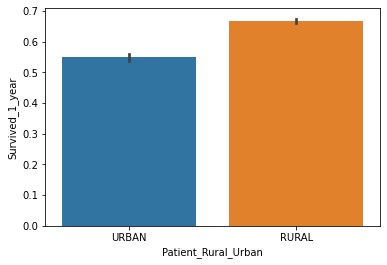

In [23]:
#draw a bar plot of survival by area
sns.barplot(x="Patient_Rural_Urban", y="Survived_1_year", data=train)

#print percentages of rural vs. urban that survive
print("Percentage of patient in rural areal who survived:", train["Survived_1_year"][train["Patient_Rural_Urban"] == 'RURAL'].value_counts(normalize = True)[1]*100)

print("Percentage of patient in urban who survived:", train["Survived_1_year"][train["Patient_Rural_Urban"] == 'URBAN'].value_counts(normalize = True)[1]*100)

Patients who live in rural area have higher survival rate.

#### Drug types

In [24]:
def bar_plot(variable):
    var = train[variable] # get feature
    varValue = var.value_counts()#count number of categorical variables
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title("variable")
    plt.show

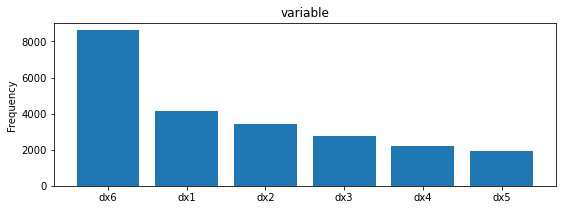

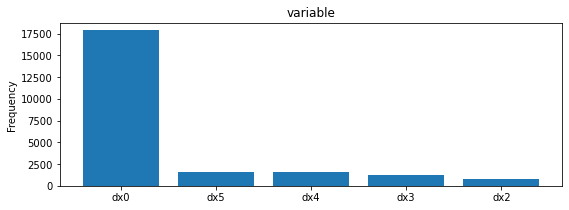

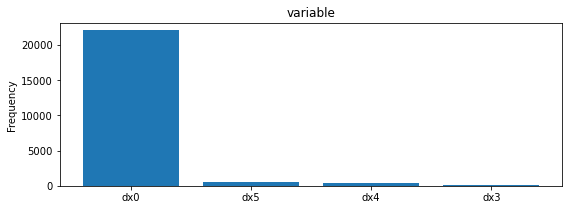

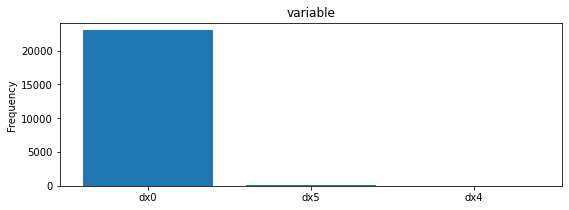

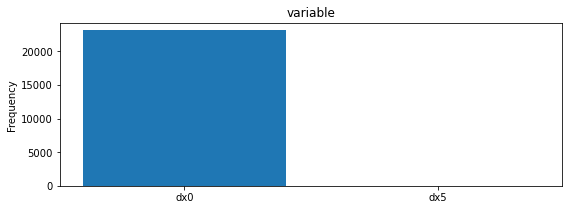

In [25]:
category1 = ["T1", "T2", "T3", "T4", "T5"]
for c in category1:
     bar_plot(c)

In [26]:
# One-hot-encode the categorical values
def col_get_dummies(df, cat_col):
    for col_name in cat_col:
        df[col_name] = df[col_name].astype("category")
        df = pd.get_dummies(df, columns = [col_name])
    return df

cat_col = ["T1", "T2", "T3", "T4", "T5", "Patient_Smoker", "Patient_Rural_Urban"]
train = col_get_dummies(train, cat_col)
test = col_get_dummies(test, cat_col)

In [27]:
# Fill nan values in Number_of_pre_cond
train["Number_of_prev_cond"] = train["Number_of_prev_cond"].fillna(train["Number_of_prev_cond"].mean())
test["Number_of_prev_cond"] = test["Number_of_prev_cond"].fillna(test["Number_of_prev_cond"].mean())

### 6) Building GradientBoostingClassifier model

#### Splitting the training data

In [28]:
from sklearn.model_selection import train_test_split
predictors = train.drop(labels = "Survived_1_year", axis = 1)
labels = train["Survived_1_year"]
x_train, x_val, y_train, y_val = train_test_split(predictors, labels, test_size = 0.22, random_state = 32)

In [30]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

81.22


### 7) Prediction

In [31]:
test_survived = pd.Series(gbk.predict(test), name = "prediction").astype(int)

In [32]:
test_survived.to_csv("prediction.csv", index = False)